# 4.10: Coding Etiquette & Excel Reporting

## This notebook contains the following-

#### 1. Import libraries and data
#### 2. Address security implications

#### 3. Regional segmentation of the data
   ##### - 3.1. Set up region column
   ##### - 3.2. Create a crosstab to compare spending habits in different regions
   

#### 4. Exclusion flag to exclude low-activity customers


#### 5. Profiling variables
   ##### - 5.1. Age
   ##### - 5.2 Income
   ##### - 5.3 Number of Dependents
   

#### 6. Visualizations to show distributions of profiles
   ##### - 6.1. Age Groups
   ##### - 6.2. Income Groups
   ##### - 6.3. Customers w/ Dependents
   

#### 7. Basic Statistics on Customer-Profile level for Usage Frequency and Expenditure
   ##### - 7.1. Age Group
   ##### - 7.2. Income Group
   ##### - 7.3. Dependents Category
   

#### 8. Comparison of Customer Profiles with Regions and Departments
   ##### - 8.1 Profile by Region
   ##### - 8.2 Profile by Department Sales
   ##### - 8.3. Profiles by Frequency
   

#### 9. Visualizations


#### 10. Export Final Data Set

#### 11. Additional Visualizations
   ##### - 11.1 Busiest day of the week
   ##### - 11.2 Busiest hours of the day
   ##### - 11.3 Top 10 Departments
   ##### - 11.4 Distribution of users according to brand loyalty
   ##### - 11.5 Ordering Habits based on Customer's Loyalty status
   ###### - 11.5.1 Average Order Total by Customer Loyalty
   ###### - 11.5.2 Order Volume by Product Price Range and Customer Loyalty
   ##### -  11.6 Ordering Habits based on Customer's Region
   ###### - 11.6.1 Average Order Total by Region
   ###### - 11.6.2 Total Product Orders by Region
   ##### -  11.7 Ordering Habits based on Family Status and Age
   ###### - 11.7.1 Average expenditure based on family status and age
   ###### - 11.7.2 Average Frequency of Order based on family status and age
   ##### - 11.8 Ordering Habits for Customer Profiles
   ###### - 11.8.1 Average Order Price by Customer Profile (Income Group)
   ###### - 11.8.2 Comparison of Age and Income Group
   ###### - 11.8.3 Comparing Age Group and Dependents
   ###### - 11.8.4 Customer Profile Heat Map

### 1. Import Libraries and Data

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Creating Path
path = r'C:\Users\ankit\Desktop\DataAnalysisCF\DataImmersion\PythonFundamentals\Instacart Basket Analysis'
# path = r'C:\Users\pratejos\Desktop\Ankita'

In [4]:
#Importing Latest Dataframe
instacart = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust.pkl'))

In [5]:
# Display all columns
pd.set_option('display.max_columns', None)

In [6]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.800781,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Regularly Busy,Least Busy Days,Most orders,3,New Customer,4.972656,Low Spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.800781,1813452,764,3,4,17,9.0,False,11,1,Mid-range product,Least Busy,Least Busy Days,Average orders,3,New Customer,4.972656,Low Spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


### 2.Address security implications

Individual coulmns dont track to a single person, but combination of columns like name, surname, age, gender,state,n_dependents, marital_status, income could lead to identification of a single person using external data sources.

This issue can be addressed by dropping name and surname columns.

In [9]:
# Dropping name, surname and _merge(unnecessary) columns
instacart = instacart.drop(columns=['first_name','surname','_merge'])

In [10]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.800781,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Regularly Busy,Least Busy Days,Most orders,3,New Customer,4.972656,Low Spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.800781,1813452,764,3,4,17,9.0,False,11,1,Mid-range product,Least Busy,Least Busy Days,Average orders,3,New Customer,4.972656,Low Spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308


### 3. Regional segmentation of the data

#### 3.1. Set up region column

In [12]:
result = []
for value in instacart['state']:
    if value in ('Maine'	'New Hampshire'	'Vermont'	'Massachusetts'	'Rhode Island'	'Connecticut'	'New York'	'Pennsylvania'	'New Jersey'
) :
        result.append('Northeast')
    elif value in ('Wisconsin'	'Michigan'	'Illinois'	'Indiana'	'Ohio'	'North Dakota'	'South Dakota'	'Nebraska'	'Kansas'	'Minnesota'	'Iowa'	'Missouri'
) :
        result.append('Midwest')
    elif value in ('Delaware'	'Maryland'	'District of Columbia'	'Virginia'	'West Virginia'	'North Carolina'	'South Carolina'	'Georgia'	'Florida'	'Kentucky'	'Tennessee'	'Mississippi'	'Alabama'	'Oklahoma'	'Texas'	'Arkansas'	'Louisiana'
) :
        result.append('South')
    elif value in ('Idaho'	'Montana'	'Wyoming'	'Nevada'	'Utah'	'Colorado'	'Arizona'	'New Mexico'	'Alaska'	'Washington'	'Oregon'	'California'	'Hawaii'
) :
        result.append('West')
    else :
        result.append('Not a region')

In [13]:
#Assigning the values in result[] to new column Region
instacart['region']=result

In [14]:
instacart['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [15]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.800781,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Regularly Busy,Least Busy Days,Most orders,3,New Customer,4.972656,Low Spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.800781,1813452,764,3,4,17,9.0,False,11,1,Mid-range product,Least Busy,Least Busy Days,Average orders,3,New Customer,4.972656,Low Spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest


### 3.2. Create a crosstab to compare spending habits in different regions

In [17]:
crosstab = pd.crosstab (instacart['region'], instacart['spender_type'],dropna = False)

In [18]:
crosstab.to_clipboard()

In [19]:
# Print the crosstab
print(crosstab)

spender_type  High Spender  Low Spender
region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559


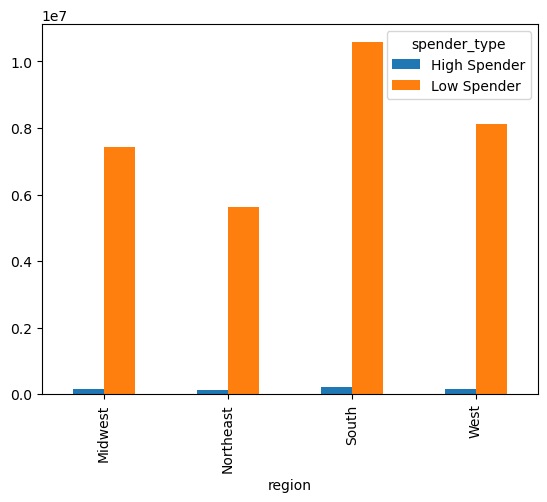

In [20]:
#Bar graph of the crosstab (for better understanding)
bar_reg_loy =  crosstab.plot.bar()

Southern Region has highest number of High Spenders as well as low spenders, follwed by West then Midwest and finally Northeast. This difference may be due to the amount of population in differnt regions. However all regions have more Low spenders than High Spenders

In [22]:
#Exporting bar graph
bar_reg_loy.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10','bar_reg_loy.png'))

### Exclusion flag to exclude low-activity customers

In [24]:
# Creating a new column to flag low-activity customers
#Exclude customers where max_order is less than 5
instacart.loc[instacart['max_order'] < 5, 'execution_flag'] = 'Exclude'

In [25]:
##Keep customers where max_order is greater than or equal to 5
instacart.loc[instacart['max_order'] >= 5, 'execution_flag'] = 'Keep'

In [26]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income,region,execution_flag
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Keep
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Keep
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,Keep
3,1,Chocolate Sandwich Cookies,61,19,5.800781,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Regularly Busy,Least Busy Days,Most orders,3,New Customer,4.972656,Low Spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Exclude
4,1,Chocolate Sandwich Cookies,61,19,5.800781,1813452,764,3,4,17,9.0,False,11,1,Mid-range product,Least Busy,Least Busy Days,Average orders,3,New Customer,4.972656,Low Spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Exclude


In [27]:
instacart['execution_flag'].value_counts()

execution_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [28]:
execution_flag_crosstab = pd.crosstab(instacart['max_order'], instacart['execution_flag'],dropna = False)

In [29]:
execution_flag_crosstab.to_clipboard()

Confirmed in Excel that, an execution flag 'Exclude' is added when max_order is less than 5

In [31]:
#Creating subset (Excluding rows that have max order less than 5)
instacart = instacart[instacart['execution_flag'] == 'Keep']

In [32]:
instacart.shape

(30964564, 33)

Number of rows is equal to the count of 'Keep' execution flag.

In [34]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income,region,execution_flag
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Keep
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Keep
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,Keep
5,1,Chocolate Sandwich Cookies,61,19,5.800781,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly Busy,Busiest Days,Average orders,26,Regular Customer,6.933594,Low Spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,Keep
6,1,Chocolate Sandwich Cookies,61,19,5.800781,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,9,New Customer,5.957031,Low Spender,20.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,Keep


In [35]:
#Removing unnecessary columns
instacart= instacart.drop(columns = 'execution_flag')

In [36]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
5,1,Chocolate Sandwich Cookies,61,19,5.800781,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly Busy,Busiest Days,Average orders,26,Regular Customer,6.933594,Low Spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West
6,1,Chocolate Sandwich Cookies,61,19,5.800781,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,9,New Customer,5.957031,Low Spender,20.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South


In [37]:
#Exporting Filtered Data
instacart.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart.pkl'))

### 5. Profiling variables

#### 5.1 Age Young adult =< 25, Adult 25-40, Older Adult 40-65, Senior 65+

In [40]:
#Creating age profiling variable
instacart.loc[instacart['age'] <= 25 ,'age_group'] = 'Young Adult'
instacart.loc[(instacart['age'] > 25) & (instacart['age'] <= 40) ,'age_group'] = 'Adult'
instacart.loc[(instacart['age'] > 40) & (instacart['age'] <= 65) ,'age_group'] = 'Older Adult'
instacart.loc[instacart['age'] > 65 ,'age_group'] = 'Senior'

In [41]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income,region,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,Senior
5,1,Chocolate Sandwich Cookies,61,19,5.800781,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly Busy,Busiest Days,Average orders,26,Regular Customer,6.933594,Low Spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,Older Adult
6,1,Chocolate Sandwich Cookies,61,19,5.800781,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,9,New Customer,5.957031,Low Spender,20.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,Young Adult


In [42]:
instacart['age_group'].value_counts()

age_group
Older Adult    12085297
Senior          7730834
Adult           7283915
Young Adult     3864518
Name: count, dtype: int64

In [43]:
#Aggregate for age group usage frequency
instacart.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                    10.820694  0.0  30.0
Older Adult              10.817067  0.0  30.0
Senior                   10.795537  0.0  30.0
Young Adult              10.799070  0.0  30.0

In [44]:
#Aggregate for age group usage frequency
instacart.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.785791  1.0  25.0
Older Adult  7.792698  1.0  25.0
Senior       7.794212  1.0  25.0
Young Adult  7.784758  1.0  25.0

### 5.2. Income :  Low, Middle, & High Income groups 

In [46]:
#Creating income profiling variable
instacart.loc[instacart['income'] <= 50000 ,'income_group'] = 'Low'
instacart.loc[(instacart['income'] > 50000) & (instacart['age'] <= 100000) ,'income_group'] = 'Middle'
instacart.loc[instacart['income'] > 100000 ,'income_group'] = 'High'

In [47]:
instacart['income_group'].value_counts()

income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

In [48]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income,region,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,Low
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,Low
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,Senior,High
5,1,Chocolate Sandwich Cookies,61,19,5.800781,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly Busy,Busiest Days,Average orders,26,Regular Customer,6.933594,Low Spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,Older Adult,Middle
6,1,Chocolate Sandwich Cookies,61,19,5.800781,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,9,New Customer,5.957031,Low Spender,20.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,Young Adult,Low


#### 5.3 Number of dependents

In [50]:
instacart.loc[instacart['n_dependants'] > 0 ,'dependents_flag'] = 'Has Dependents'
instacart.loc[instacart['n_dependants'] == 0 ,'dependents_flag'] = 'No Dependents'

In [51]:
instacart['dependents_flag'].value_counts()

dependents_flag
Has Dependents    23224883
No Dependents      7739681
Name: count, dtype: int64

In [52]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income,region,age_group,income_group,dependents_flag
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,Low,Has Dependents
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,Low,Has Dependents
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,Senior,High,Has Dependents
5,1,Chocolate Sandwich Cookies,61,19,5.800781,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly Busy,Busiest Days,Average orders,26,Regular Customer,6.933594,Low Spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,Older Adult,Middle,Has Dependents
6,1,Chocolate Sandwich Cookies,61,19,5.800781,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,9,New Customer,5.957031,Low Spender,20.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,Young Adult,Low,Has Dependents


### 6. Visualizations to show distributions of profiles

#### 6.1 Age Groups

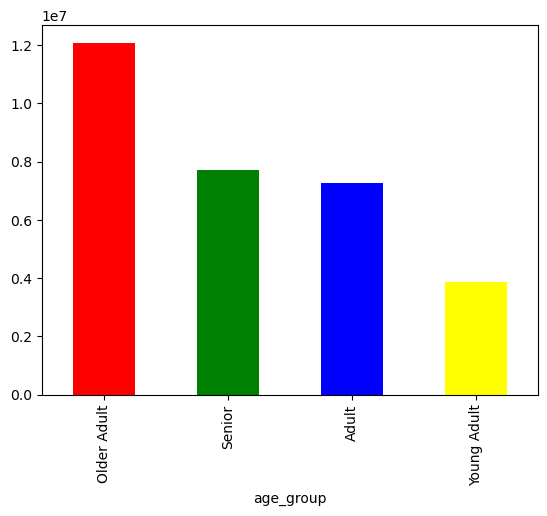

In [54]:
# 6.1.A Age Profile Visualization Bar Chart
bar_age_group = instacart['age_group'].value_counts().plot.bar(color = ['red','green','blue','yellow'])

In [55]:
# Export Bar Chart

bar_age_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10','5.1.bar_age_group.png'))

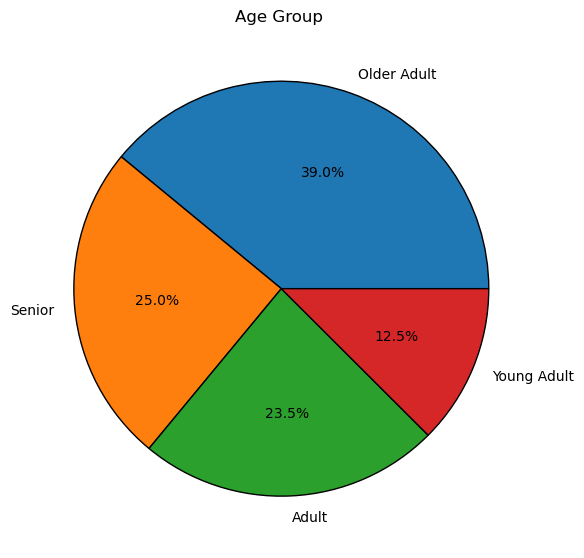

In [56]:
# 6.1.B Age Profile Visualization Pie Chart
pie_age_group_counts = instacart['age_group'].value_counts()
plt.figure(figsize=(6,6))
age_group_pie_chart=pie_age_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Age Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [57]:
# Export Pie Chart

age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', '5.1.age_group_pie_chart.png'))

#### 6.2 Income Group

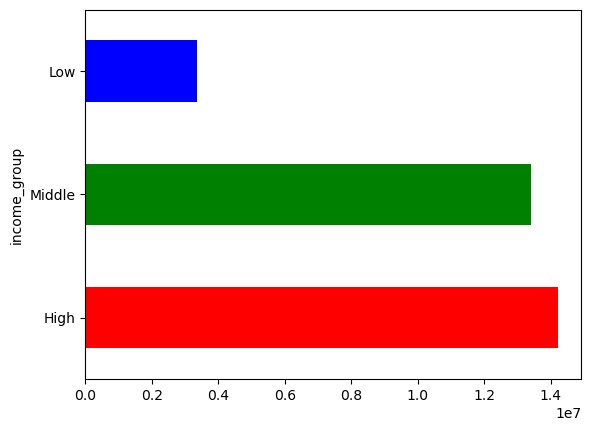

In [58]:
# 6.2.A Income Profile Visualization Horizontal Bar Chart
bar_income_group = instacart['income_group'].value_counts().plot.barh(color = ['red','green','blue'])

In [59]:
# Export Bar Chart

bar_income_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', '5.2.bar_income_group.png'))

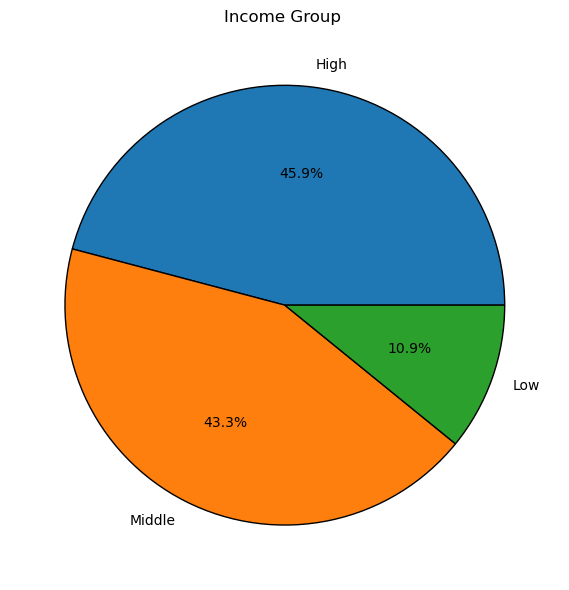

In [268]:
#6.2 B. Income Profile Visualization Pie Chart
pie_income_group_counts = instacart['income_group'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart=pie_income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [61]:
# Export Pie Chart

income_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', '5.2.income_group_pie_chart.png'))

#### 6.3 Customers w/ Dependents

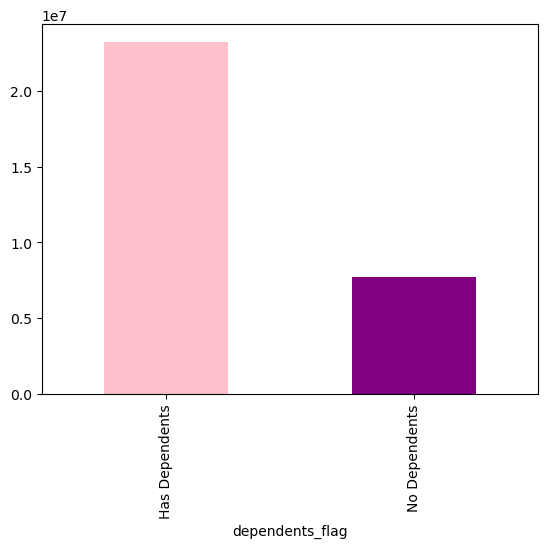

In [62]:
# 6.3.A Creating Dependents Visualization Bar Chart
dependents_flag_bar_chart=instacart['dependents_flag'].value_counts().plot.bar(color = ['pink','purple'])

In [63]:
# Export Bar Chart

dependents_flag_bar_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', '5.3.dependents_flag_bar_chart.png'))

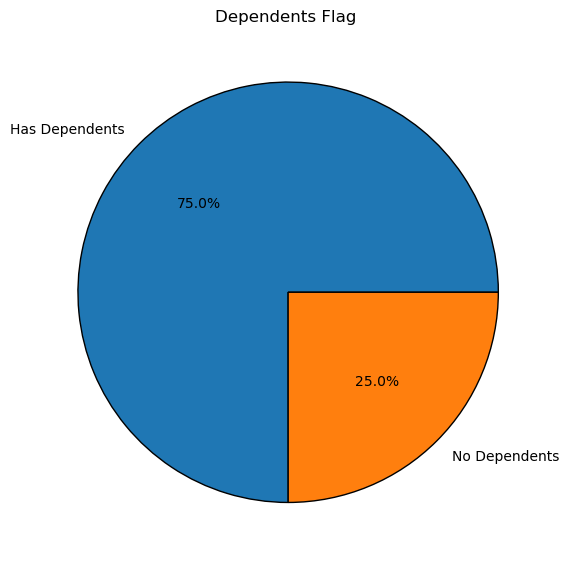

In [64]:
# 6.3.B Creating dependents visualization Pie Chart
dependents_flag_counts = instacart['dependents_flag'].value_counts()
plt.figure(figsize=(6,6))
dependents_flag_pie_chart=dependents_flag_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Dependents Flag ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [65]:
# Export Pie Chart

dependents_flag_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', '5.3.dependents_flag_pie_chart.png'))

### 7.Basic Statistics on Customer-Profile level for Usage Frequency and Expenditure

##### Usage frequency is analyzed based on days since prior order & expenditure based on prices columns. 

In [68]:
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_type', 'median_prior_order', 'frequency',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'region', 'age_group', 'income_group',
       'dependents_flag'],
      dtype='object')

In [69]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income,region,age_group,income_group,dependents_flag
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,Low,Has Dependents
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,Low,Has Dependents
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,Senior,High,Has Dependents
5,1,Chocolate Sandwich Cookies,61,19,5.800781,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly Busy,Busiest Days,Average orders,26,Regular Customer,6.933594,Low Spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,Older Adult,Middle,Has Dependents
6,1,Chocolate Sandwich Cookies,61,19,5.800781,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,9,New Customer,5.957031,Low Spender,20.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,Young Adult,Low,Has Dependents


In [335]:
# An aggregated subset of data with 'prices' column as the total cost of each order:
# Creating aggregation subset of customer profile
customer_profile = instacart.groupby(['user_id','order_number','loyalty_flag','spender_type','region','age_group','income_group','marital_status','dependents_flag','days_since_prior_order'])['prices'].sum().reset_index()

In [186]:
customer_profile

,user_id,order_number,loyalty_flag,spender_type,region,age_group,income_group,marital_status,dependents_flag,days_since_prior_order,prices
0,1,2,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,15.0,35.394531
1,1,3,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,21.0,28.199219
2,1,4,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,29.0,26.000000
3,1,5,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,28.0,56.996094
4,1,6,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,19.0,25.000000
...,...,...,...,...,...,...,...,...,...,...,...
2901748,206209,9,Regular Customer,Low Spender,Midwest,Senior,High,married,Has Dependents,22.0,26.199219
2901749,206209,10,Regular Customer,Low Spender,Midwest,Senior,High,married,Has Dependents,29.0,64.695312
2901750,206209,11,Regular Customer,Low Spender,Midwest,Senior,High,married,Has Dependents,30.0,56.095703
2901751,206209,12,Regular Customer,Low Spender,Midwest,Senior,High,married,Has Dependents,18.0,131.489258


In [355]:
# Rename 'prices' to 'order_total'
customer_profile.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [194]:
customer_profile['order_total'].dtype

dtype('float32')

In [357]:
customer_profile['order_total'] = customer_profile['order_total'].astype('float64')

In [353]:
customer_profile

,user_id,order_number,loyalty_flag,spender_type,region,age_group,income_group,marital_status,dependents_flag,days_since_prior_order,order_total
0,1,2,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,15.0,35.394531
1,1,3,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,21.0,28.199219
2,1,4,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,29.0,26.000000
3,1,5,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,28.0,56.996094
4,1,6,New Customer,Low Spender,South,Adult,Low,married,Has Dependents,19.0,25.000000
...,...,...,...,...,...,...,...,...,...,...,...
2901748,206209,9,Regular Customer,Low Spender,Midwest,Senior,High,married,Has Dependents,22.0,26.199219
2901749,206209,10,Regular Customer,Low Spender,Midwest,Senior,High,married,Has Dependents,29.0,64.695312
2901750,206209,11,Regular Customer,Low Spender,Midwest,Senior,High,married,Has Dependents,30.0,56.095703
2901751,206209,12,Regular Customer,Low Spender,Midwest,Senior,High,married,Has Dependents,18.0,131.489258


#### 7.1 Age Group

In [77]:
age_agg = customer_profile.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']})       

In [78]:
age_agg

days_since_prior_order            order_total                  
                              mean  min   max        mean  min          max
age_group                                                                  
Adult                    10.414843  0.0  30.0   79.217109  0.0   829.196289
Older Adult              10.381320  0.0  30.0   78.496977  0.0  1092.204102
Senior                   10.367964  0.0  30.0   78.312815  0.0   751.124023
Young Adult              10.380577  0.0  30.0   78.870237  0.0   842.087891

#### 7.2 Income Group

In [80]:
income_agg = customer_profile.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']}) 

In [81]:
income_agg

days_since_prior_order            order_total                  
                               mean  min   max        mean  min          max
income_group                                                                
High                      10.260991  0.0  30.0   83.754603  0.0  1092.204102
Low                       11.070340  0.0  30.0   52.672130  1.0   874.989258
Middle                    10.290003  0.0  30.0   81.928644  0.0   852.494141

#### 7.3 Dependents Category

In [83]:
dependents_agg = customer_profile.groupby('dependents_flag').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']})       

In [84]:
dependents_agg

days_since_prior_order            order_total       \
                                  mean  min   max        mean  min   
dependents_flag                                                      
Has Dependents               10.388226  0.0  30.0   78.727098  0.0   
No Dependents                10.378169  0.0  30.0   78.480800  0.0   

                              
                         max  
dependents_flag               
Has Dependents   1092.204102  
No Dependents     874.989258

### 8.Comparison of Customer Profiles with Regions and Departments

In [86]:
# Importing department dataframe
dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [87]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [88]:
# Renaming index column as department_id
dept.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [89]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [90]:
#Merging instacart dataset with department dataset
instacart_dept = instacart.merge(dept, on = 'department_id', how = 'left', indicator = True)

In [91]:
instacart_dept.shape 

(30964564, 37)

In [92]:
# Exporting New Merged Dataframe
instacart_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_dept.pkl'))

In [93]:
#Importing Merged Data
instacart_dept = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_dept.pkl'))

In [94]:
instacart_dept.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_type,median_prior_order,frequency,gender,state,age,date_joined,n_dependants,marital_status,income,region,age_group,income_group,dependents_flag,department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,Low,Has Dependents,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly Busy,Regularly Busy Days,Average orders,32,Regular Customer,6.937500,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,Low,Has Dependents,snacks,both
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest Day,Busiest Days,Average orders,5,New Customer,7.929688,Low Spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,Senior,High,Has Dependents,snacks,both
3,1,Chocolate Sandwich Cookies,61,19,5.800781,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly Busy,Busiest Days,Average orders,26,Regular Customer,6.933594,Low Spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,Older Adult,Middle,Has Dependents,snacks,both
4,1,Chocolate Sandwich Cookies,61,19,5.800781,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly Busy,Regularly Busy Days,Most orders,9,New Customer,5.957031,Low Spender,20.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,Young Adult,Low,Has Dependents,snacks,both


In [95]:
instacart_dept['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

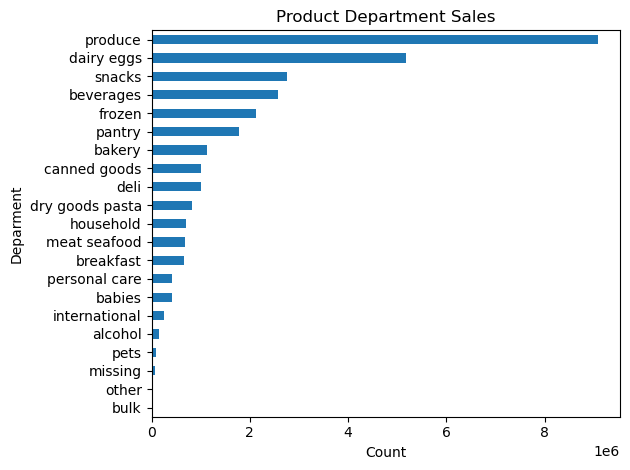

In [96]:
#Creating bar chart of Departments
dept_bar = instacart_dept['department'].value_counts().sort_values(ascending= True).plot.barh()
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Deparment')
plt.tight_layout()

In [97]:
#Exporting Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10','8.departments_product_bar.png'))

In [98]:
# Selecting relevant columns
user_sample = instacart_dept[['user_id','age_group','income_group','dependents_flag','region','loyalty_flag']]

In [99]:
user_sample = user_sample.drop_duplicates()

In [100]:
user_sample.shape

(162631, 6)

In [101]:
user_sample

,user_id,age_group,income_group,dependents_flag,region,loyalty_flag
0,138,Senior,Low,Has Dependents,Midwest,Regular Customer
2,709,Senior,High,Has Dependents,Northeast,New Customer
3,777,Older Adult,Middle,Has Dependents,West,Regular Customer
4,825,Young Adult,Low,Has Dependents,South,New Customer
5,910,Older Adult,Low,No Dependents,South,Regular Customer
...,...,...,...,...,...,...
29070178,169498,Older Adult,High,Has Dependents,Northeast,New Customer
29359263,28213,Older Adult,High,Has Dependents,South,New Customer
30051109,18512,Senior,Middle,No Dependents,Midwest,New Customer
30506396,31628,Adult,Low,Has Dependents,South,New Customer


#### 8.1 Customer Profile by Regions


##### 8.1.1 Comparing age_group with region

In [104]:
age_region_comparison = pd.crosstab(instacart_dept['age_group'],instacart_dept['region'],dropna = False)

In [105]:
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Adult,1693049,1273976,2460039,1856851
Older Adult,2870703,2116310,3987077,3111207
Senior,1799606,1394490,2549034,1987704
Young Adult,898155,679909,1314989,971465


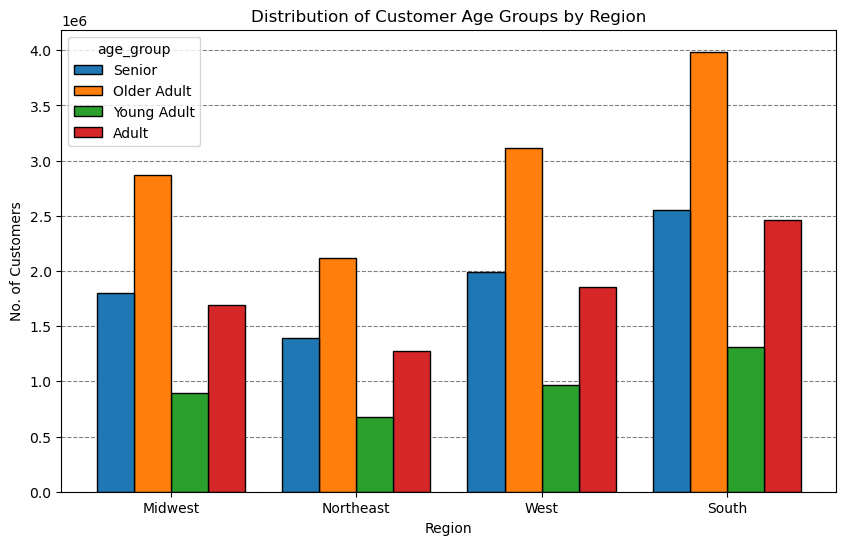

In [106]:
# Plotting Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10','instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

##### 8.1.2 Comparing income_group with regions

In [108]:
income_region_comparison = pd.crosstab(instacart_dept['income_group'],instacart_dept['region'],dropna = False)

In [109]:
income_region_comparison

region,Midwest,Northeast,South,West
income_group,,,,
High,3400093,2516484,4663571,3626880
Low,783764,587137,1142572,849081
Middle,3077656,2361064,4504996,3451266


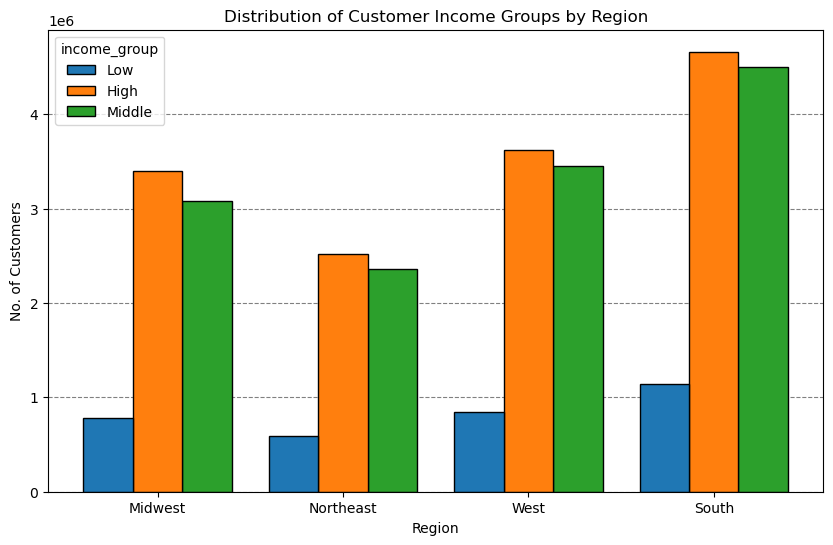

In [110]:
# Plotting Histogram for income group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10','instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

##### 8.1.3 Comparing Departments and Region

In [112]:
dept_region_comparison = pd.crosstab(instacart_dept['department'],instacart_dept['region'],dropna = False)

In [113]:
dept_region_comparison

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


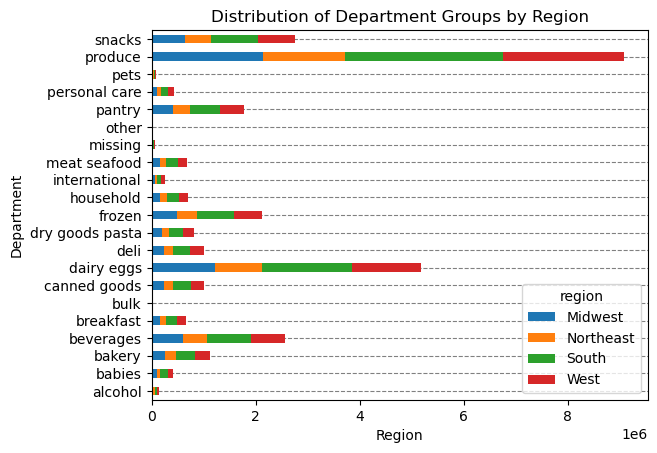

In [114]:
# Region_department Bar Chart

bar5 = dept_region_comparison.plot.barh(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Department')
plt.xlabel('Region')

# Exporting bar chart

bar5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', 'bar_region_department.png'))

##### 8.1.4 Comparing Dependents and Region

In [116]:
depend_region_comp  = pd.crosstab(instacart_dept['dependents_flag'],instacart_dept['region'],dropna = False)

In [117]:
depend_region_comp

region,Midwest,Northeast,South,West
dependents_flag,,,,
Has Dependents,5438697,4110203,7729206,5946777
No Dependents,1822816,1354482,2581933,1980450


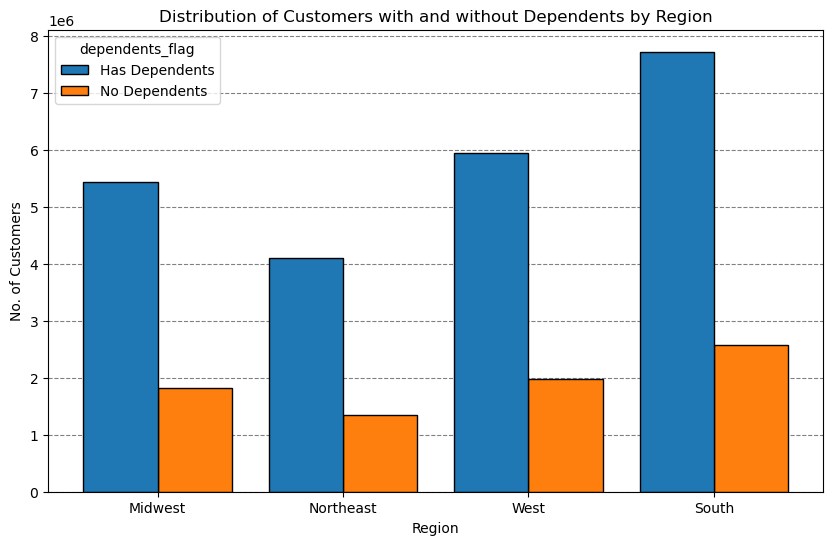

In [118]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=instacart_dept, x='region', hue='dependents_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependents by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10','instacart_dependents_by_region.png'), bbox_inches = 'tight')
plt.show()

In [470]:
fam_region_comp  = pd.crosstab(instacart_dept['marital_status'],instacart_dept['region'],dropna = False)
fam_region_comp

region,Midwest,Northeast,South,West
marital_status,,,,
divorced/widowed,617198,478767,877314,671992
living with parents and siblings,351435,256430,505457,367850
married,5087262,3853773,7223749,5578927
single,1205618,875715,1704619,1308458


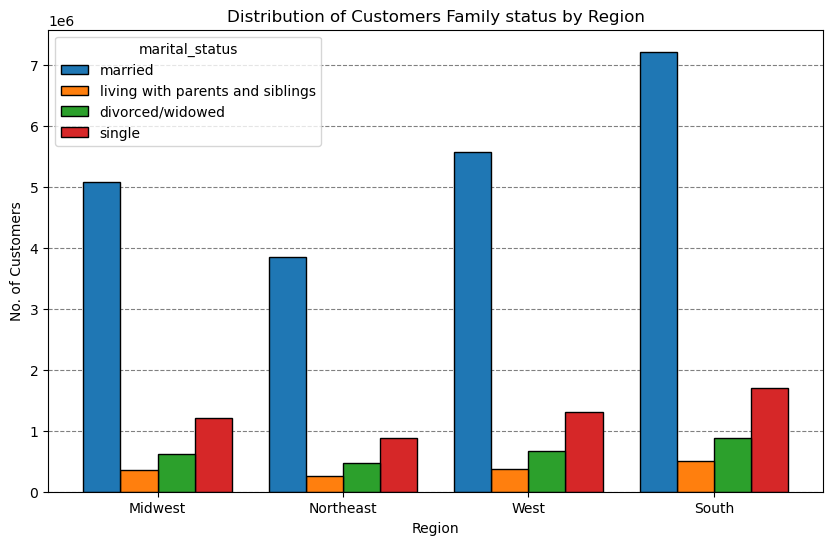

In [472]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=instacart_dept, x='region', hue='marital_status', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers Family status by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10','instacart_fam_by_region.png'), bbox_inches = 'tight')
plt.show()

#### 8.2 Customer Profile by Department Sales

##### 8.2.1 Comparing age group and department

In [121]:
age_dept_comp  = pd.crosstab(instacart_dept['department'],instacart_dept['age_group'],dropna = False)

In [122]:
age_dept_comp

age_group,Adult,Older Adult,Senior,Young Adult
department,,,,
alcohol,34623,56125,34691,19188
babies,96430,162566,100162,51234
bakery,262625,439872,278458,139873
beverages,597066,1010078,646414,318343
breakfast,156557,263325,165491,85477
bulk,7797,13012,8336,4306
canned goods,239510,394312,251940,126312
dairy eggs,1224854,2013796,1291039,647493
deli,236817,391999,250463,124555


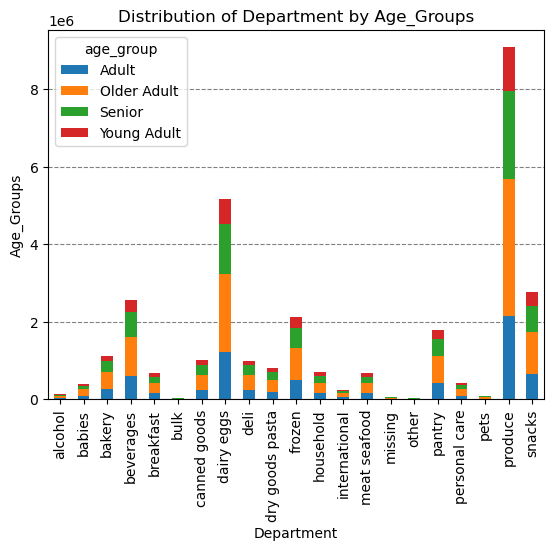

In [123]:
# Age Group_department Bar Chart

bar5 = age_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Age_Groups')
plt.xlabel('Department')
plt.ylabel('Age_Groups')

# Exporting bar chart

bar5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', 'bar_age_gp_department.png'))

##### 8.2.2 Comparing Income group and Department

In [125]:
income_dept_comp  = pd.crosstab(instacart_dept['department'],instacart_dept['income_group'],dropna = False)

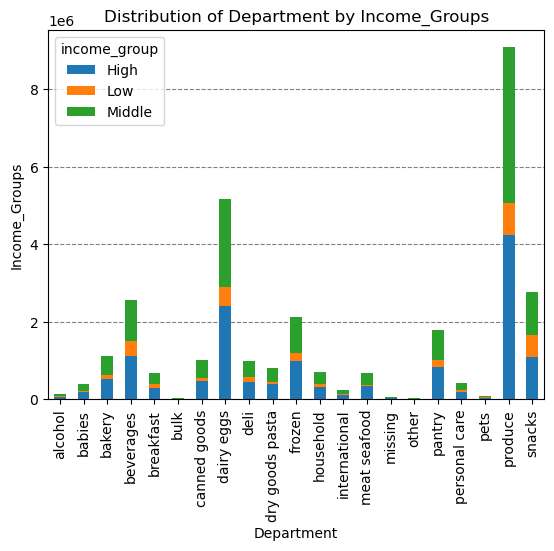

In [126]:
# Income Group_department Bar Chart

bar6 = income_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Income_Groups')
plt.xlabel('Department')
plt.ylabel('Income_Groups')

# Exporting bar chart

bar6.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', 'bar_income_gp_department.png'))

In [127]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = instacart_dept.groupby(['income_group', 'department']).size().reset_index(name='counts')

In [128]:
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

In [129]:
income_department_counts.head(50)

,income_group,department,counts
61,Middle,produce,4016038
49,Middle,dairy eggs,2268659
62,Middle,snacks,1102298
45,Middle,beverages,1062343
52,Middle,frozen,918102
58,Middle,pantry,776724
44,Middle,bakery,486368
48,Middle,canned goods,447873
50,Middle,deli,435297
51,Middle,dry goods pasta,364946


#####  Top 5 departments for all income groups, i.e Low, Middle and High Income Group are Produce, dairy eggs, snacks, beverages and frozen.

##### 8.2.3 Comparing Dependents Flag and Department

In [132]:
depend_dept_comp  = pd.crosstab(instacart_dept['department'],instacart_dept['dependents_flag'],dropna = False)

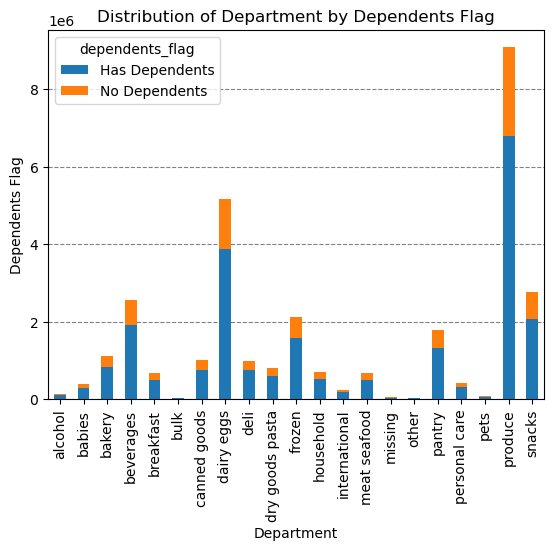

In [133]:
# Dependents Flag department Bar Chart

bar7 = depend_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Dependents Flag')
plt.xlabel('Department')
plt.ylabel('Dependents Flag')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10','bar_depnd_department.png'))

#### 8.3 Profiles by Frequency

##### 8.3.1 Income Groups

In [136]:
income_freq = pd.crosstab(instacart_dept['income_group'],instacart_dept['frequency'],dropna = False)

In [137]:
income_freq

frequency,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High,9779323,1290502,3137203
Low,2199082,376138,787334
Middle,9226071,1228335,2940576


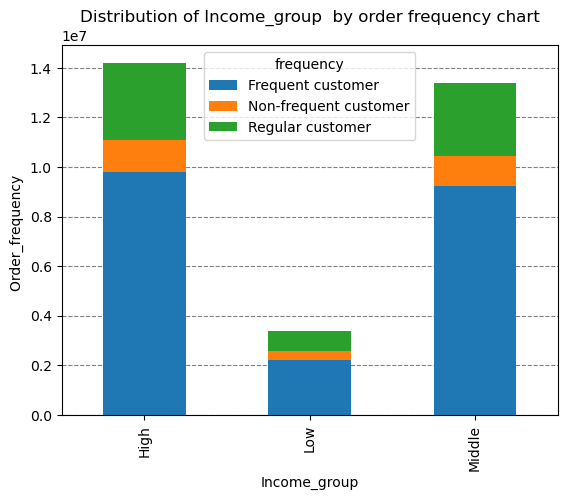

In [138]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Income_group')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', 'bar_income_frequency.png'))

##### 8.3.2 Age Group , Frequency Comparison

In [140]:
# Creating crosstab for age and frequency

age_freq = pd.crosstab(instacart_dept['age_group'], instacart_dept['frequency'], dropna = False)
age_freq

frequency,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,4975423,672918,1635574
Older Adult,8264416,1146065,2674816
Senior,5310708,717553,1702573
Young Adult,2653929,358439,852150


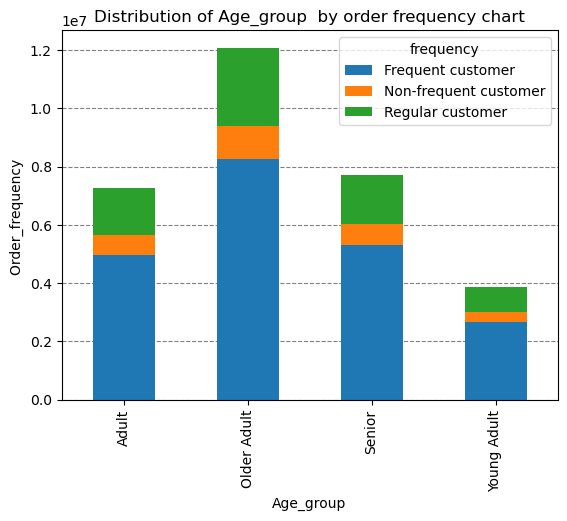

In [141]:
# Age Group and Order frequency Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Age_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Age_group')

# Exporting bar chart

bar8.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', 'bar_age_freq.png'))

##### 8.3.3 Marital status Frequency Comparison

In [143]:
# Creating crosstab for marital status and frequency

marital_freq = pd.crosstab(instacart_dept['marital_status'], instacart_dept['frequency'], dropna = False)
marital_freq

frequency,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


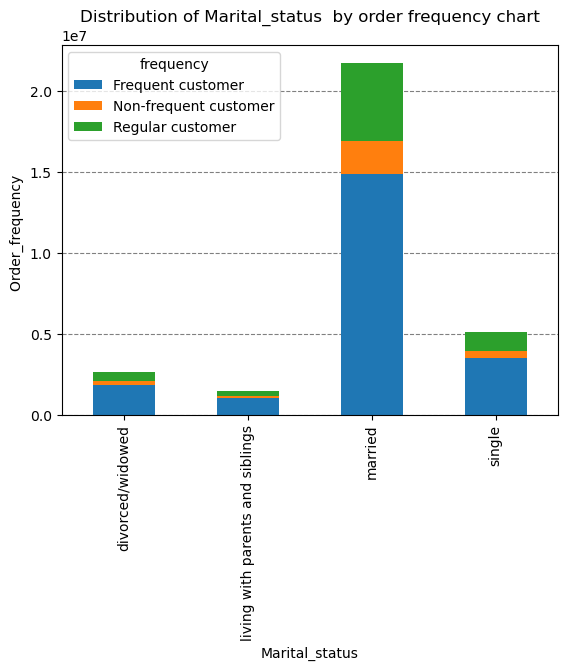

In [144]:
#Marital_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Marital_status  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Marital_status')

# Exporting bar chart

bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10','bar_marital_freq.png'))

##### 8.3.4 Departments and Frequency Comparison

In [146]:
# Creating crosstab for department and frequency
dep_freq = pd.crosstab(instacart_dept['department'], instacart_dept['frequency'], dropna = False)
dep_freq

frequency,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,100491,13271,30865
babies,316214,25297,68881
bakery,770435,103019,247374
beverages,1756158,244136,571607
breakfast,455837,64106,150907
bulk,25087,2514,5850
canned goods,658729,108011,245334
dairy eggs,3623889,452920,1100373
deli,674588,98098,231148


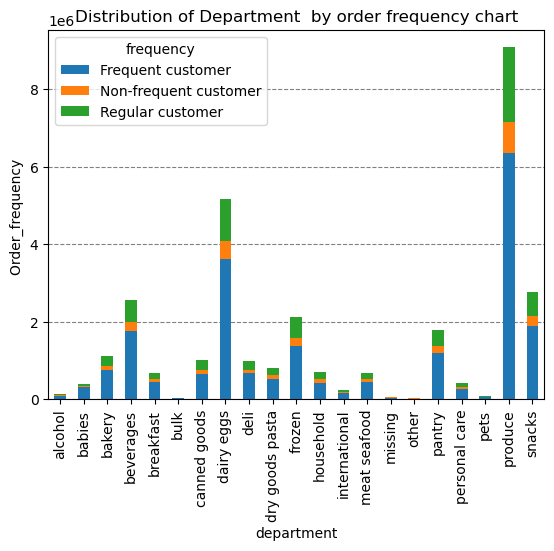

In [147]:
#dept_freq Bar Chart

bar9 = dep_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('department')

# Exporting bar chart
bar9.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', 'bar_dept_frequency.png'))

### 9. Visualizations

##### Visualizations are exported throughout the script.

### 10. Export final Data Set

In [151]:
instacart_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart_final.pkl'))

### 11. Additional Visualizations

#### 11.1 Busiest day of the week

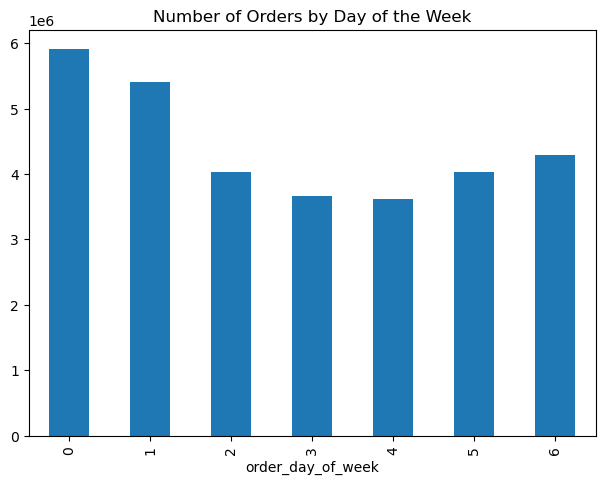

In [479]:
# Create a bar chart showing busiest days of the week

plt.title('Number of Orders by Day of the Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit labels
plt.xlabel('Day of Week')


bar_order_day = instacart['order_day_of_week'].value_counts().sort_index().plot.bar()

bar_busiest_days_of_week = plt.gcf()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', 'bar_busiest_days_of_week.png'), bbox_inches = 'tight')


#### 11.2 Busiest hours of the day

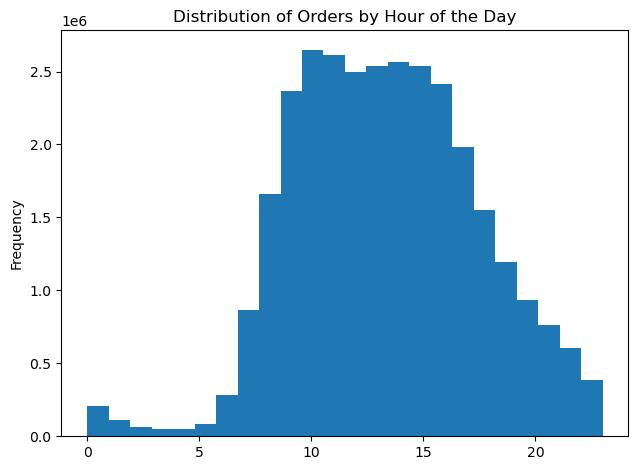

In [482]:
# Create a histogram showing the distribution of sales by order hour of the day

# Set formatting
plt.title('Distribution of Orders by Hour of the Day')
plt.tight_layout()  # Adjust layout to fit labels
plt.xlabel('Hour of Day')

# Plot chart
hist_busiest_hour_of_day = instacart['order_hour_of_day'].plot.hist(bins = 24)

hist_busiest_hour_of_day = plt.gcf()

# Display the plot
plt.show()
hist_busiest_hour_of_day.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', 'hist_busiest_hour_of_day.png'), dpi=300, bbox_inches='tight')

#### 11.3 Top 10 Departments

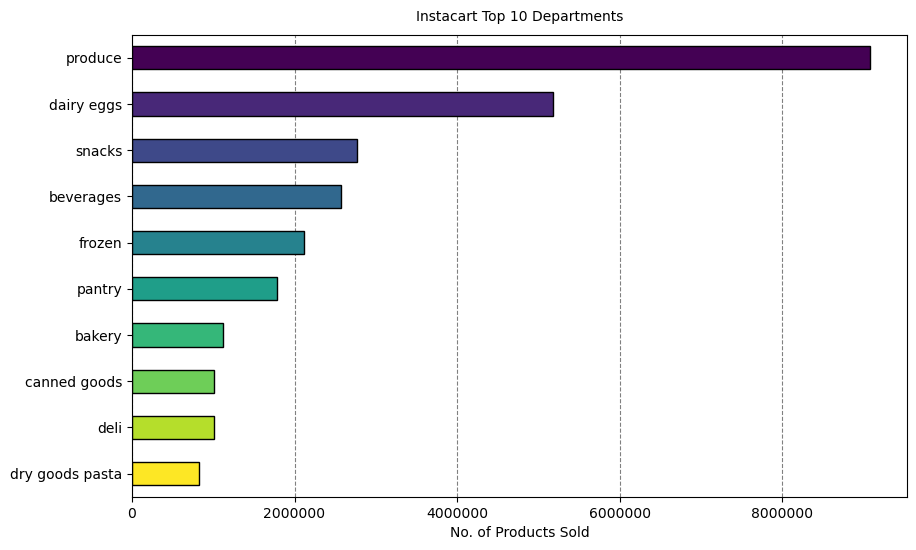

In [152]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

instacart_dept['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10', 'Instacart_department_sales.png'), bbox_inches = 'tight')


#### 11.4 Distribution of users according to brand loyalty

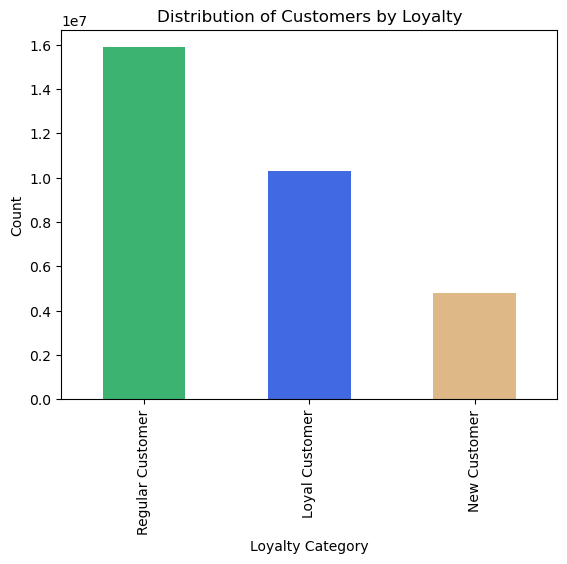

In [154]:
# Create bar chart on 'loyalty_flag' frequency

# Plot chart
bar_loyalty = instacart['loyalty_flag'].value_counts().plot.bar(color = ['mediumseagreen', 'royalblue', 'burlywood'])

# Set formatting
plt.title('Distribution of Customers by Loyalty')
plt.ylabel('Count')
plt.xlabel('Loyalty Category')
bar_loyalty = plt.gcf()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10',  'bar_loyalty.png'), bbox_inches = 'tight')

#### 11.5 Ordering Habits based on Customer's Loyalty status

##### 11.5.1 Average Order Total by Customer Loyalty

In [156]:
# Compute average order_total
loyalty_order_total = customer_profile.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()
loyalty_order_total

,loyalty_flag,order_total
0,Regular Customer,79.664995
1,Loyal Customer,77.886258
2,New Customer,77.012946


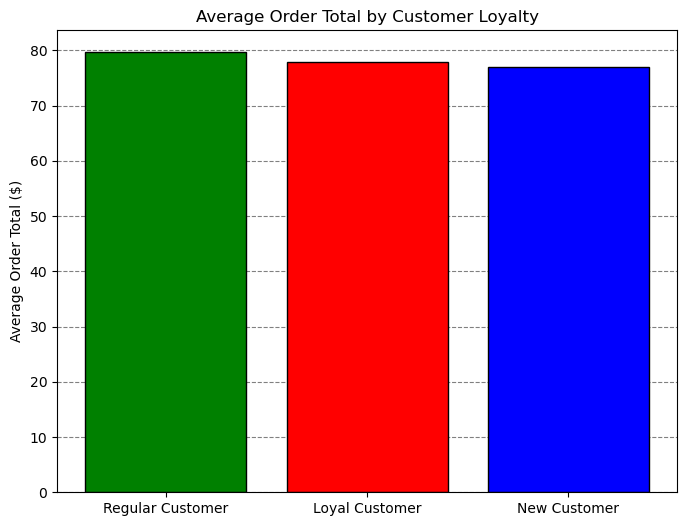

In [157]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['green', 'red', 'blue']

# Plot bars
bars = plt.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10',  'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

##### 11.5.2 Order Volume by Product Price Range and Customer Loyalty

In [158]:
# Grouping by Price Range
# Create a dataframe that contains the counts for each price_range for each loyaty group
loyalty_price_range = instacart.groupby(['loyalty_flag', 'price_range_loc']).size().unstack(fill_value=0)
loyalty_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal Customer,119936,3214690,6949467
New Customer,65927,1501288,3236480
Regular Customer,212090,4958862,10705824


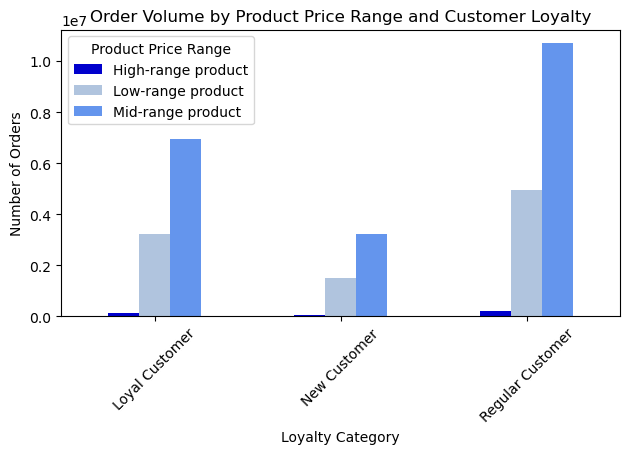

In [159]:
# Custom colors
colors = ['mediumblue', 'lightsteelblue', 'cornflowerblue']

# Plot the grouped bar chart
loyalty_price_range.plot(kind='bar', stacked=False, color=colors)
plt.title('Order Volume by Product Price Range and Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Product Price Range')
plt.tight_layout()
product_price_range_by_loyalty = plt.gcf()
product_price_range_by_loyalty.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10',  'product_price_range_by_loyalty.png'), dpi=300, bbox_inches='tight')

#### 11.6 Ordering Habits based on Customer's Region

##### 11.6.1 Average Order Total by Region


In [161]:
# Average order_total per region
region_avg_order_total = customer_profile.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [162]:
region_avg_order_total

,region,order_total
0,West,78.787798
1,Northeast,78.667843
2,South,78.625410
3,Midwest,78.586934


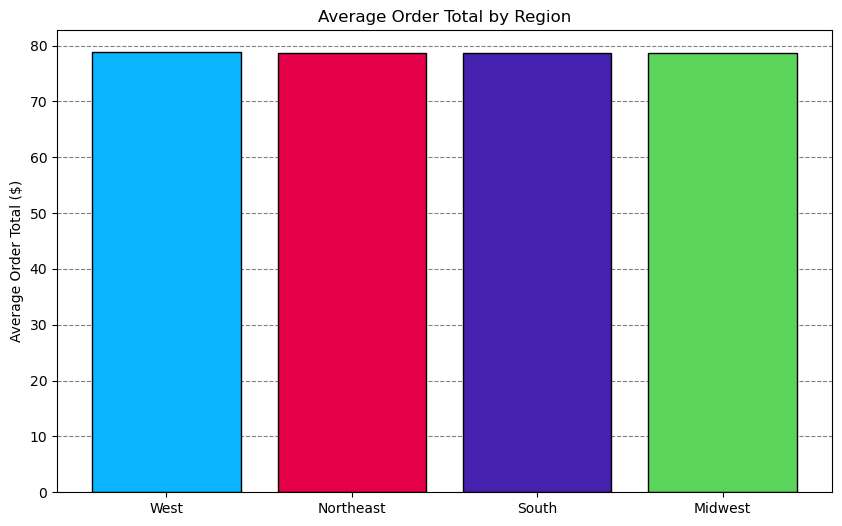

In [163]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], 
               region_avg_order_total['order_total'], 
               color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10', 'instacart_average_order_by_region.png'), bbox_inches = 'tight')

##### 11.6.2 Total Product Orders by Region

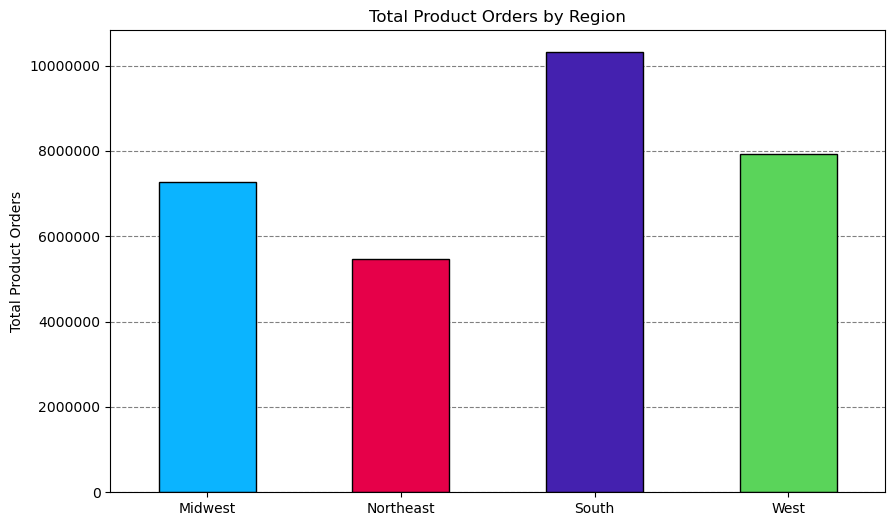

In [165]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
instacart['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10','instacart_total_orders_by_region.png'), bbox_inches = 'tight')

#### 11.7 Ordering Habits based on Family Status and Age

##### 11.7.1 Average expenditure based on family status and age

In [442]:
order_total_age_marital = customer_profile.groupby(['marital_status','age_group'])['order_total'].mean().unstack(fill_value=0)
order_total_age_marital

age_group,Adult,Older Adult,Senior,Young Adult
marital_status,,,,
divorced/widowed,0.000000,79.620978,78.670483,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,79.415639
married,79.329367,78.572866,78.196301,78.891264
single,78.883445,77.851573,0.000000,78.002185


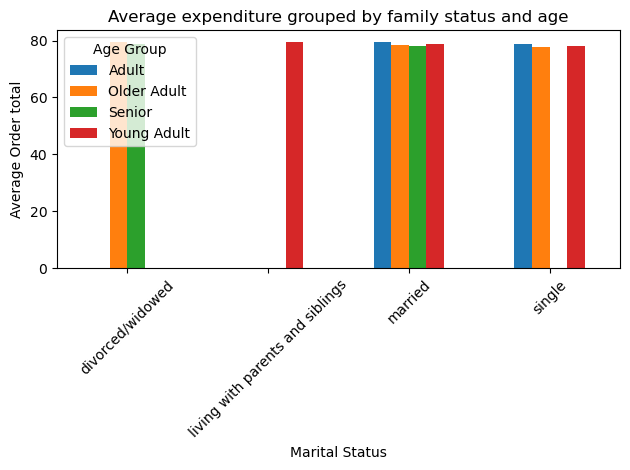

In [449]:
# Plot the grouped bar chart
order_total_age_marital.plot(kind='bar', stacked=False)
plt.title('Average expenditure grouped by family status and age')
plt.xlabel('Marital Status')
plt.ylabel('Average Order total')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
order_total_age_marital_status = plt.gcf()
order_total_age_marital_status.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10',  'order_total_age_marital_status.png'), dpi=300, bbox_inches='tight')

##### 11.7.2 Average Frequency of Order based on family status and age

In [444]:
freq_age_marital = customer_profile.groupby(['marital_status','age_group'])['days_since_prior_order'].mean().unstack(fill_value=0)
freq_age_marital

age_group,Adult,Older Adult,Senior,Young Adult
marital_status,,,,
divorced/widowed,0.000000,10.254361,10.390384,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,10.301480
married,10.399832,10.418023,10.360660,10.357880
single,10.459456,10.279148,0.000000,10.535649


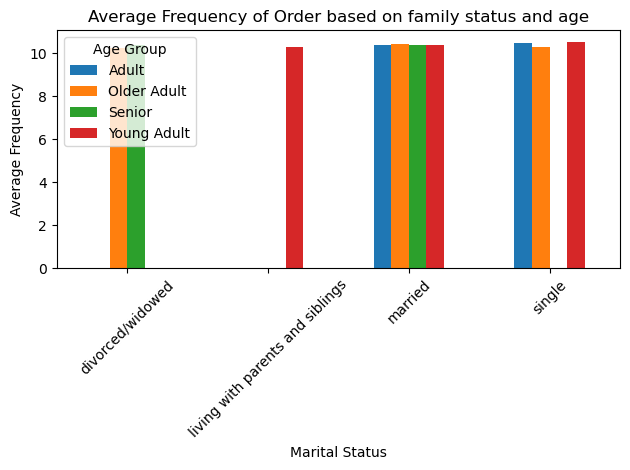

In [446]:
# Plot the grouped bar chart
freq_age_marital.plot(kind='bar', stacked=False)
plt.title('Average Frequency of Order based on family status and age')
plt.xlabel('Marital Status')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
freq_age_marital_status = plt.gcf()
freq_age_marital_status.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10', 'freq_age_marital_status.png'), dpi=300, bbox_inches='tight')

### 11.8 Ordering Habits for Customer Profiles


##### 11.8.1 Average Order Price by Customer Profile (Income Group)

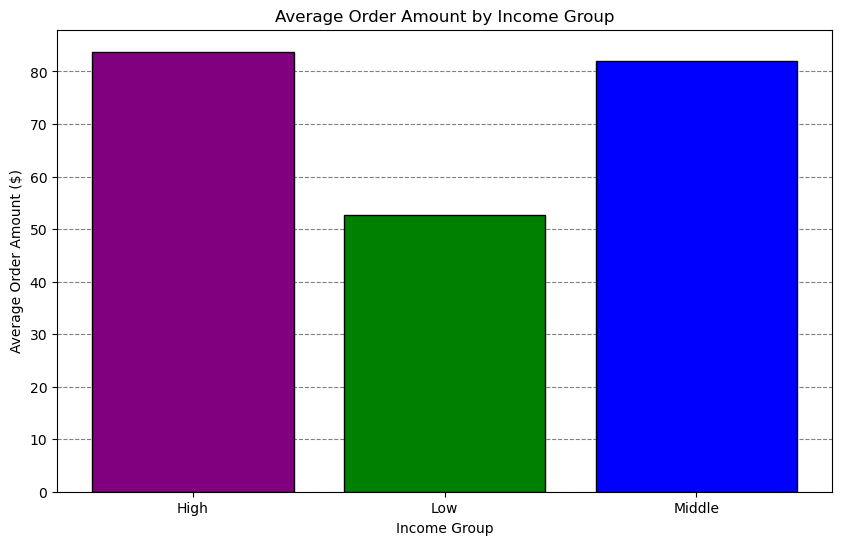

In [205]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(income_agg.index, income_agg['order_total', 'mean'], color=['purple', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10','instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

##### 11.8.2 Comparison of Age and Income Group

In [240]:
#Comparing Age Group and Income Group
age_income_compr = pd.crosstab (instacart['age_group'], instacart['income_group'],dropna = False)
age_income_compr

income_group,High,Low,Middle
age_group,,,
Adult,234817,1119794,5929304
Older Adult,8432714,1006126,2646457
Senior,5413785,637365,1679684
Young Adult,125712,599269,3139537


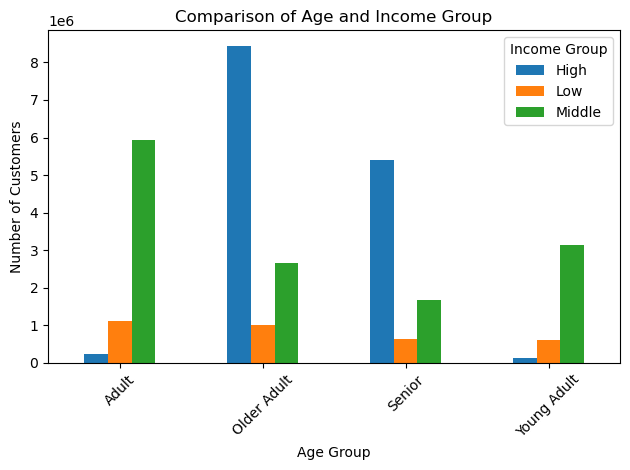

In [242]:
# Plot the  bar chart
age_income_compr.plot(kind='bar', stacked=False)
plt.title('Comparison of Age and Income Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.tight_layout()
age_income_compr = plt.gcf()
age_income_compr.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10',  'age_income_compr.png'), dpi=300, bbox_inches='tight')

##### 11.8.3 Comparing Age Group and Dependents

In [244]:
#Comparing Age Group and Dependents
age_depend_compr = pd.crosstab (instacart['age_group'], instacart['dependents_flag'],dropna = False)
age_depend_compr

dependents_flag,Has Dependents,No Dependents
age_group,,
Adult,5456883,1827032
Older Adult,9031596,3053701
Senior,5825113,1905721
Young Adult,2911291,953227


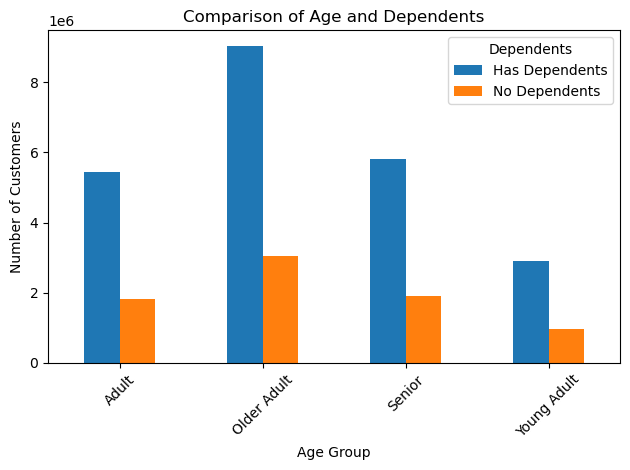

In [246]:
# Plot the  bar chart
age_depend_compr.plot(kind='bar', stacked=False)
plt.title('Comparison of Age and Dependents')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Dependents')
plt.tight_layout()
age_depend_compr = plt.gcf()
age_depend_compr.savefig(os.path.join(path,'04 Analysis','Visualizations','Task10',  'age_depend_compr.png'), dpi=300, bbox_inches='tight')

##### 11.8.4 Customer Profile Heat Map

In [213]:
customer_profile_new = customer_profile.groupby(['marital_status','dependents_flag','age_group','income_group']).size().unstack(fill_value=0)
customer_profile_new

income_group                                                    High    Low  \
marital_status                   dependents_flag age_group                    
divorced/widowed                 No Dependents   Older Adult   45719   7502   
                                                 Senior       120596  19438   
living with parents and siblings Has Dependents  Young Adult    4307  25032   
married                          Has Dependents  Adult         15681  94277   
                                                 Older Adult  564538  95057   
                                                 Senior       366660  61739   
                                                 Young Adult    3957  26106   
single                           No Dependents   Adult          5132  32174   
                                                 Older Adult  147390  24578   
                                                 Young Adult    2889  17449   

income_group                                                  Middle  
marital_status                   dependents_flag age_group            
divorced/widowed                 No Dependents   Older Adult   15394  
                                                 Senior        38849  
living with parents and siblings Has Dependents  Young Adult  108431  
married                          Has Dependents  Adult        397140  
                                                 Older Adult  187765  
                                                 Senior       120728  
                                                 Young Adult  103306  
single                           No Dependents   Adult        133302  
                                                 Older Adult   47163  
                                                 Young Adult   69454

In [221]:
customer_profile_transposed = customer_profile_new.T
customer_profile_transposed

marital_status  divorced/widowed         living with parents and siblings  \
dependents_flag    No Dependents                           Has Dependents   
age_group            Older Adult  Senior                      Young Adult   
income_group                                                                
High                       45719  120596                             4307   
Low                         7502   19438                            25032   
Middle                     15394   38849                           108431   

marital_status         married                                        single  \
dependents_flag Has Dependents                                 No Dependents   
age_group                Adult Older Adult  Senior Young Adult         Adult   
income_group                                                                   
High                     15681      564538  366660        3957          5132   
Low                      94277       95057   61739       26106         32174   
Middle                  397140      187765  120728      103306        133302   

marital_status                           
dependents_flag                          
age_group       Older Adult Young Adult  
income_group                             
High                 147390        2889  
Low                   24578       17449  
Middle                47163       69454

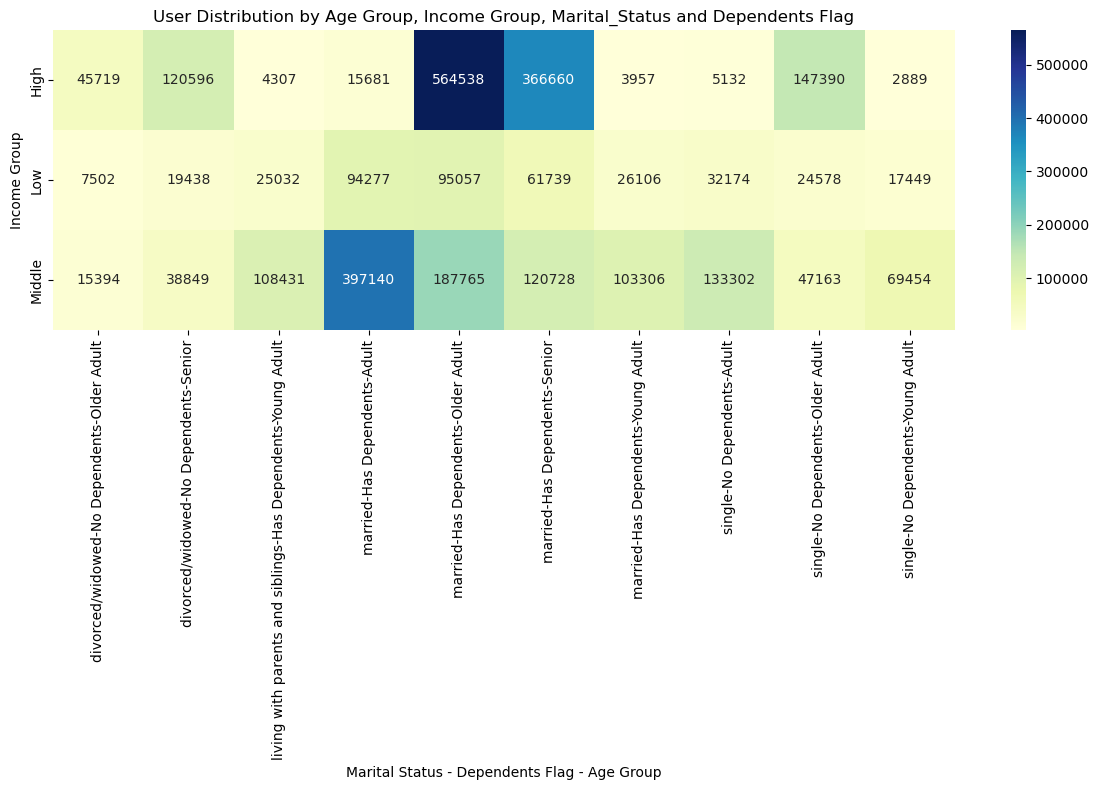

In [468]:
plt.figure(figsize=(12, 8))
# Plot heatmap
sns.heatmap(customer_profile_transposed, annot=True, fmt='d', cmap='YlGnBu')
plt.title('User Distribution by Age Group, Income Group, Marital_Status and Dependents Flag')
plt.ylabel('Income Group')
plt.xlabel('Marital Status - Dependents Flag - Age Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task10', 'user_distribution_heatmap.png'), bbox_inches='tight')
plt.show()